In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [106]:
df = pd.read_csv('hospital_data.csv')
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,11/4/2019 0:00,"$1,183.22",$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,8:35:45,9:17:54,9:29:46,DR05350C4,C10001
1,11/6/2019 0:00,$738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,DR09451Z4,C10002
2,11/2/2019 0:00,$660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,DR17400I4,C10003
3,11/6/2019 0:00,$600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,9:38:34,10:55:50,10:58:02,DR09451Z4,C10004
4,11/1/2019 0:00,$591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,DR15154H4,C10005


In [107]:
#df.dtypes

In [108]:
df['Date'] = pd.to_datetime(df['Date'])

In [109]:
#df.dtypes

In [110]:
df.columns

Index(['Date', ' Medication Revenue ', '  Lab Cost ', ' Consultation Revenue ',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [111]:
df.columns = df.columns.str.strip()

In [112]:
df.columns

Index(['Date', 'Medication Revenue', 'Lab Cost', 'Consultation Revenue',
       'Doctor Type', 'Financial Class', 'Patient Type', 'Entry Time',
       'Post-Consultation Time', 'Completion Time', 'Doctor', 'Patient ID'],
      dtype='object')

In [113]:
df['Entry Time'] = pd.to_datetime(df['Entry Time'])
df['Post-Consultation Time'] = pd.to_datetime(df['Post-Consultation Time'])
df['Completion Time'] = pd.to_datetime(df['Completion Time'])

In [114]:
df.dtypes

Date                      datetime64[ns]
Medication Revenue                object
Lab Cost                          object
Consultation Revenue              object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [115]:
def clean_digits(values):
    values = values.replace('$','')
    values = values.replace(',','')
    values = values.replace('-','')
    values = values.replace(' ','')
    values = pd.to_numeric(values)
    return values

In [116]:
df.head()
df.dtypes

Date                      datetime64[ns]
Medication Revenue                object
Lab Cost                          object
Consultation Revenue              object
Doctor Type                       object
Financial Class                   object
Patient Type                      object
Entry Time                datetime64[ns]
Post-Consultation Time    datetime64[ns]
Completion Time           datetime64[ns]
Doctor                            object
Patient ID                        object
dtype: object

In [117]:
df['Medication Revenue'] = df['Medication Revenue'].apply(clean_digits)
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID
0,2019-11-04,1183.22,$10.00,$20.17,ANCHOR,HMO,OUTPATIENT,2021-03-19 08:35:45,2021-03-19 09:17:54,2021-03-19 09:29:46,DR05350C4,C10001
1,2019-11-06,738.48,$-,$15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-03-19 19:19:16,2021-03-19 21:02:36,2021-03-19 21:24:07,DR09451Z4,C10002
2,2019-11-02,660.00,$-,$21.17,ANCHOR,HMO,OUTPATIENT,2021-03-19 10:46:52,2021-03-19 11:56:25,2021-03-19 12:06:28,DR17400I4,C10003
3,2019-11-06,600.00,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,2021-03-19 09:38:34,2021-03-19 10:55:50,2021-03-19 10:58:02,DR09451Z4,C10004
4,2019-11-01,591.60,$-,$12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-03-19 11:16:21,2021-03-19 12:06:49,2021-03-19 12:06:54,DR15154H4,C10005


In [118]:
df['Lab Cost'] = df['Lab Cost'].apply(clean_digits)
df['Consultation Revenue'] = df['Consultation Revenue'].apply(clean_digits)

In [119]:
df.head()
df = df.fillna(0)

In [120]:
df['Total Revenue'] = df['Medication Revenue'] + df['Lab Cost'] + df['Consultation Revenue']

In [121]:
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-03-19 08:35:45,2021-03-19 09:17:54,2021-03-19 09:29:46,DR05350C4,C10001,1213.39
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-03-19 19:19:16,2021-03-19 21:02:36,2021-03-19 21:24:07,DR09451Z4,C10002,753.48
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2021-03-19 10:46:52,2021-03-19 11:56:25,2021-03-19 12:06:28,DR17400I4,C10003,681.17
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2021-03-19 09:38:34,2021-03-19 10:55:50,2021-03-19 10:58:02,DR09451Z4,C10004,600.00
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-03-19 11:16:21,2021-03-19 12:06:49,2021-03-19 12:06:54,DR15154H4,C10005,603.60


**What Time Has The Most Visitors**

In [122]:
df['Entry Hour'] = df['Entry Time'].dt.hour
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue,Entry Hour
0,2019-11-04,1183.22,10.0,20.17,ANCHOR,HMO,OUTPATIENT,2021-03-19 08:35:45,2021-03-19 09:17:54,2021-03-19 09:29:46,DR05350C4,C10001,1213.39,8
1,2019-11-06,738.48,0.0,15.00,ANCHOR,INSURANCE,OUTPATIENT,2021-03-19 19:19:16,2021-03-19 21:02:36,2021-03-19 21:24:07,DR09451Z4,C10002,753.48,19
2,2019-11-02,660.00,0.0,21.17,ANCHOR,HMO,OUTPATIENT,2021-03-19 10:46:52,2021-03-19 11:56:25,2021-03-19 12:06:28,DR17400I4,C10003,681.17,10
3,2019-11-06,600.00,0.0,0.00,ANCHOR,MEDICARE,OUTPATIENT,2021-03-19 09:38:34,2021-03-19 10:55:50,2021-03-19 10:58:02,DR09451Z4,C10004,600.00,9
4,2019-11-01,591.60,0.0,12.00,ANCHOR,INSURANCE,OUTPATIENT,2021-03-19 11:16:21,2021-03-19 12:06:49,2021-03-19 12:06:54,DR15154H4,C10005,603.60,11


In [133]:
entryGrouping = df.groupby('Entry Hour')['Patient ID'].count()

<AxesSubplot:xlabel='Entry Hour'>

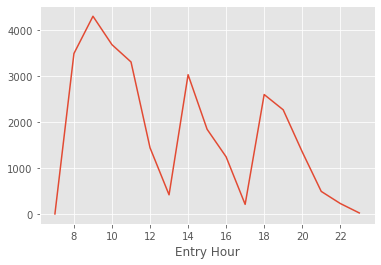

In [137]:
plt.style.use('ggplot')
entryGrouping.plot()

**Does the Total Revenue correlate with the total visitors**

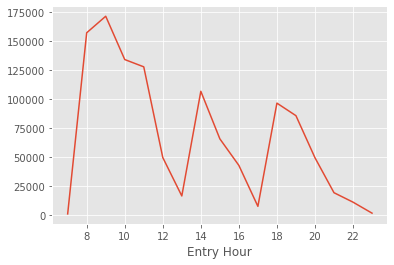

In [141]:
revenueGrouping = df.groupby('Entry Hour')['Total Revenue'].sum().plot()

In [144]:
pivot1 = df.groupby(df['Entry Hour']).sum()
pivot2 = df.groupby(df['Entry Hour']).count()
merger = pivot1.merge(pivot2, on='Entry Hour')

In [145]:
merger.head()

,Medication Revenue_x,Lab Cost_x,Consultation Revenue_x,Total Revenue_x,Date,Medication Revenue_y,Lab Cost_y,Consultation Revenue_y,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Doctor,Patient ID,Total Revenue_y
Entry Hour,,,,,,,,,,,,,,,,,
7,350.66,520.00,198.63,1069.29,12,12,12,12,12,12,12,12,12,12,12,12,12
8,83404.62,22475.27,51180.15,157060.04,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489,3489
9,96195.61,14879.28,60216.56,171291.45,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297
10,75239.66,6688.98,52072.67,134001.31,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680,3680
11,72675.83,6860.23,48192.03,127728.09,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306,3306


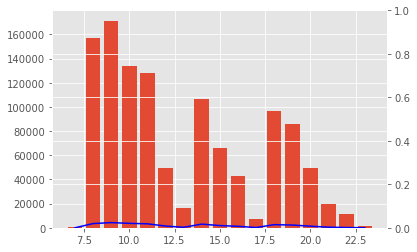

In [151]:
fig ,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(merger.index,merger['Total Revenue_x'])
ax1.plot(merger.index,merger['Patient ID'],color='blue')

In [155]:
df.describe()

,Medication Revenue,Lab Cost,Consultation Revenue,Total Revenue,Entry Hour
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,20.636023,2.229082,15.267733,38.132838,13.004533
std,33.250707,14.690394,10.454275,37.463327,4.071030
min,0.000000,0.000000,0.000000,0.000000,7.000000
25%,0.000000,0.000000,10.000000,23.370000,9.000000
50%,13.600000,0.000000,13.000000,32.000000,12.000000
75%,29.400000,0.000000,23.040000,47.400000,16.000000
max,1183.220000,520.000000,120.000000,1213.390000,23.000000


# What percentage of revenue comes from different insurance types

In [158]:
insuregroup = df.groupby(df['Financial Class'])['Total Revenue'].sum()

In [159]:
insuregroup

Financial Class
CORPORATE    255660.08
HMO          215925.07
INSURANCE    461539.69
MEDICARE      24539.28
PRIVATE      186282.88
Name: Total Revenue, dtype: float64

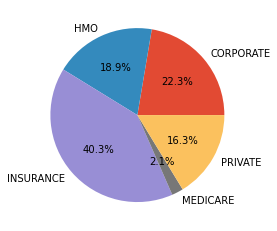

In [168]:
plt.pie(insuregroup,labels=insuregroup.index,autopct='%1.1f%%');